#Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Import necessary libraries for data processing, model training, visualization & performance metrics
from fastai.vision.all import *
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import torch.nn as nn
import random

# Setting a seed for reproducibility
random.seed(42)

In [ ]:
# Define path to data
path = Path('/content/gdrive/My Drive/477 Project - Fall 2023/Capacitive Images IPCCC2016 Rilvan/ex1')

In [ ]:
# Function to retrieve all image files from 'ear' directories
def get_ear_image_files(path):
    return [p for p in path.rglob('ear/*.jpg')]

# Function to label the items (Used in datablock)
def label_func(f): return f.parent.parent.name

# Function to determine if a file is in the validation set (Used in datablock)
def is_valid_func(f):
    return f in valid_files

In [ ]:
# Retrieve all ear images
all_files = get_ear_image_files(path)

# Get all labels from the file paths
all_labels = [label_func(f) for f in all_files]

# Split the data into a 60% training set and a 40% temporary set (to be divided into validation and test sets), stratified by labels
train_files, temp_files, train_labels, temp_labels = train_test_split(all_files, all_labels, test_size=0.4, stratify=all_labels, random_state=42)

# Split the remaining 40% of data equally between validation and test sets, resulting in a final split of 60% train, 20% valid, and 20% test
valid_files, test_files, valid_labels, test_labels = train_test_split(temp_files, temp_labels, test_size=0.5, stratify=temp_labels, random_state=42)

In [ ]:
# This script counts and displays the number of image files associated with
# each individual by extracting the user's name from the file path structure.

counts = defaultdict(int)

# Function to extract the name from the file path
def get_name_from_file(file_path):
    name = file_path.parent.parent.name
    return name.lower()

# Update the counts for each file
for f in all_files:
    name = get_name_from_file(Path(f))
    counts[name] += 1

# Print out the counts
for name, count in sorted(counts.items()):
    print(f"{name}: {count}")

bree: 20
cody: 20
dennis: 20
eric: 20
evanmoyher: 20
isaiah: 20
jesse: 20
john: 20
justin: 20
kevin: 20
kolby: 20
kristina: 20
lamarque: 20
maddie: 20
mohamed: 20
mudhasir: 20
sal: 20
thomas: 20
veronica: 20
victor: 20
yodsapath: 20


#Dataloader

In [ ]:
# Create a DataBlock
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=FuncSplitter(is_valid_func),
                   get_y=label_func
                   )

# Create a Dataloader from the train and valid files
dls = dblock.dataloaders(train_files + valid_files, bs=32)

In [ ]:
dls.vocab

['Bree', 'Cody', 'Dennis', 'Eric', 'EvanMoyher', 'Isaiah', 'Jesse', 'John', 'Justin', 'Kevin', 'Kolby', 'Kristina', 'Lamarque', 'Maddie', 'Mohamed', 'Mudhasir', 'Sal', 'Thomas', 'Veronica', 'Victor', 'yodsapath']

In [ ]:
# Display # of batches in each set
print(f"Number of batches in the training set: {len(dls.train)}")
print(f"Number of batches in the validation set: {len(dls.valid)}")

# Display # of samples in each set
print(f"Number of samples in the training set: {len(dls.train_ds)}")
print(f"Number of samples in the validation set: {len(dls.valid_ds)}")

Number of batches in the training set: 7
Number of batches in the validation set: 3
Number of samples in the training set: 252
Number of samples in the validation set: 84


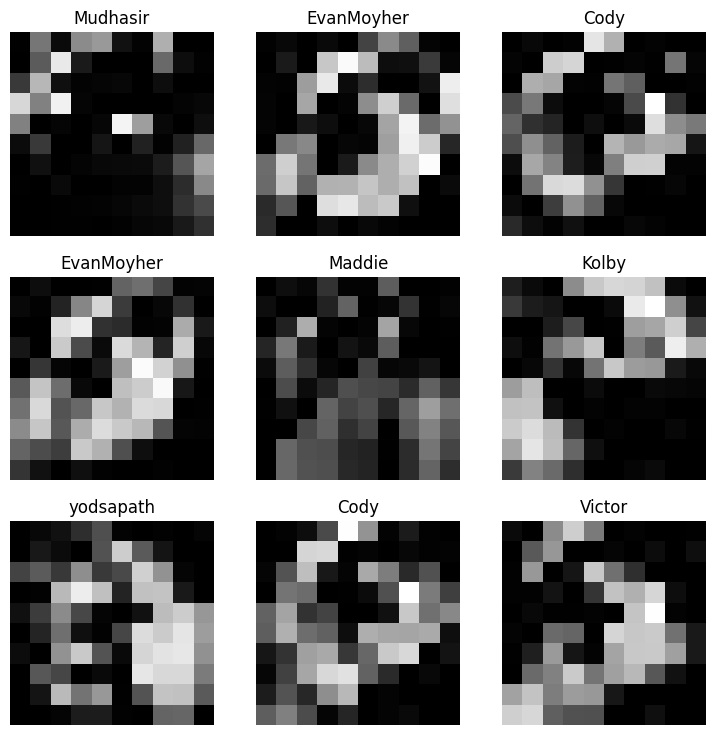

In [ ]:
dls.show_batch()

#Training

In [ ]:
loss_func = nn.CrossEntropyLoss()

#Create learner
learn = vision_learner(dls, resnet18, metrics=[error_rate], opt_func=Adam, loss_func = loss_func)

epoch,train_loss,valid_loss,error_rate,time
0,4.323882,3.270863,0.952381,00:37
1,3.675436,4.392273,0.892857,00:02
2,3.133883,3.238133,0.785714,00:01
3,2.746829,2.495572,0.702381,00:01
4,2.437249,1.979928,0.523810,00:02


Better model found at epoch 0 with valid_loss value: 3.2708628177642822.


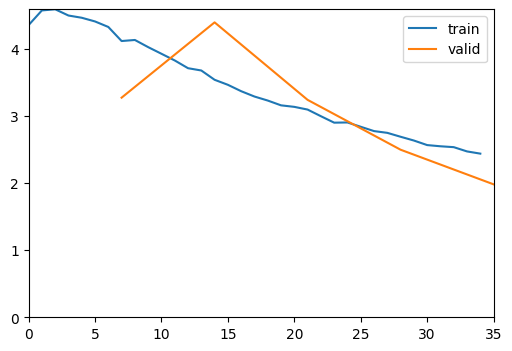

Better model found at epoch 2 with valid_loss value: 3.238133430480957.
Better model found at epoch 3 with valid_loss value: 2.495572328567505.
Better model found at epoch 4 with valid_loss value: 1.9799277782440186.


In [ ]:
# Freeze model except for final layer
learn.freeze()

# Train final layer
learn.fit_one_cycle(5,
    lr_max= 0.01,
    cbs=[
        ShowGraphCallback(),
        SaveModelCallback(monitor='valid_loss', fname='best_model_phase1', every_epoch=False)
        ])

In [ ]:
learn.load('best_model_phase1',with_opt=False)

epoch,train_loss,valid_loss,error_rate,time
0,1.552224,1.797043,0.488095,00:04
1,1.414163,1.998160,0.452381,00:05
2,1.493317,3.753453,0.547619,00:04
3,1.435304,15.521238,0.714286,00:05
4,1.463485,16.203924,0.642857,00:05
5,1.406465,3.257185,0.357143,00:04
6,1.320104,2.464894,0.404762,00:06
7,1.273535,0.952498,0.250000,00:05
8,1.236403,1.251314,0.285714,00:06
9,1.174055,1.063543,0.285714,00:04


Better model found at epoch 0 with valid_loss value: 1.7970428466796875.


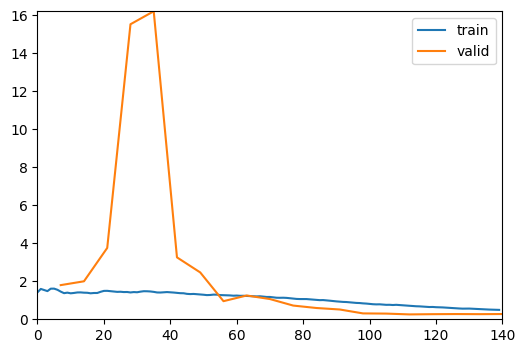

Better model found at epoch 7 with valid_loss value: 0.9524983167648315.
Better model found at epoch 10 with valid_loss value: 0.7211094498634338.
Better model found at epoch 11 with valid_loss value: 0.5930444598197937.
Better model found at epoch 12 with valid_loss value: 0.5149966478347778.
Better model found at epoch 13 with valid_loss value: 0.3089498281478882.
Better model found at epoch 14 with valid_loss value: 0.29883095622062683.
Better model found at epoch 15 with valid_loss value: 0.2561380863189697.


In [ ]:
# Unfreeze model
learn.unfreeze()

# Train the entire model
learn.fit_one_cycle(
    20,
    lr_max= 0.003,
    cbs=[
        ShowGraphCallback(),
        SaveModelCallback(monitor='valid_loss', fname='best_model_phase2', every_epoch=False)
        ])

In [ ]:
learn.load('best_model_phase2', with_opt=False)

#Validation Set Performance

In [ ]:
# Get predictions and targets from learner
preds, targets = learn.get_preds()

# Convert predictions to class label
pred_labels = preds.argmax(dim=-1)


print(classification_report(targets, pred_labels, target_names=dls.vocab))

              precision    recall  f1-score   support

        Bree       0.75      0.75      0.75         4
        Cody       1.00      1.00      1.00         4
      Dennis       0.80      1.00      0.89         4
        Eric       1.00      1.00      1.00         4
  EvanMoyher       1.00      1.00      1.00         4
      Isaiah       0.40      0.50      0.44         4
       Jesse       1.00      1.00      1.00         4
        John       1.00      0.75      0.86         4
      Justin       1.00      1.00      1.00         4
       Kevin       1.00      1.00      1.00         4
       Kolby       1.00      1.00      1.00         4
    Kristina       1.00      1.00      1.00         4
    Lamarque       1.00      1.00      1.00         4
      Maddie       1.00      0.75      0.86         4
     Mohamed       1.00      1.00      1.00         4
    Mudhasir       1.00      1.00      1.00         4
         Sal       1.00      1.00      1.00         4
      Thomas       1.00    

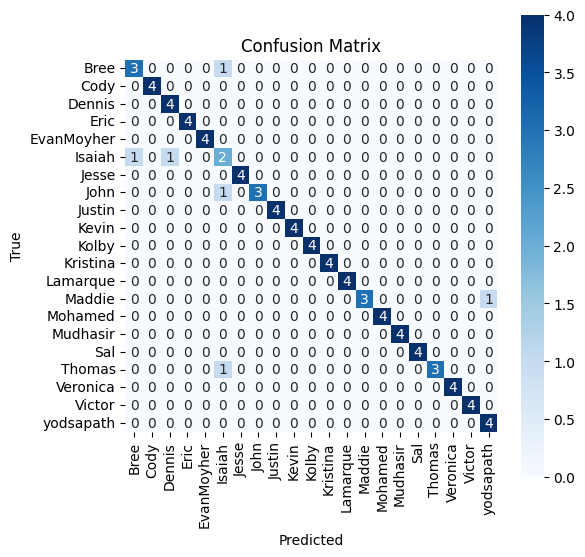

In [ ]:
# Calculate the confusion matrix
cm_valid = confusion_matrix(targets, pred_labels)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6,6))
sns.heatmap(cm_valid, annot=True, fmt='d', cmap='Blues', xticklabels=dls.vocab, yticklabels=dls.vocab, square=True)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#Test Set Performance

In [ ]:
test_dl = dls.test_dl(test_files, with_labels=True)

# Print the number of items in the test set
print(f"Number of samples in the test set: {len(test_dl.dataset)}")

Number of samples in the test set: 84


In [ ]:
preds_test, true_labels = learn.get_preds(dl=test_dl)

# Convert predictions to class label
pred_labels = preds_test.argmax(dim=-1)

print(classification_report(true_labels, pred_labels, target_names=dls.vocab))

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


              precision    recall  f1-score   support

        Bree       0.80      1.00      0.89         4
        Cody       1.00      0.75      0.86         4
      Dennis       1.00      1.00      1.00         4
        Eric       1.00      1.00      1.00         4
  EvanMoyher       1.00      1.00      1.00         4
      Isaiah       0.80      1.00      0.89         4
       Jesse       1.00      1.00      1.00         4
        John       1.00      0.75      0.86         4
      Justin       1.00      1.00      1.00         4
       Kevin       1.00      1.00      1.00         4
       Kolby       1.00      1.00      1.00         4
    Kristina       1.00      1.00      1.00         4
    Lamarque       1.00      1.00      1.00         4
      Maddie       0.80      1.00      0.89         4
     Mohamed       1.00      1.00      1.00         4
    Mudhasir       0.67      1.00      0.80         4
         Sal       1.00      1.00      1.00         4
      Thomas       1.00    

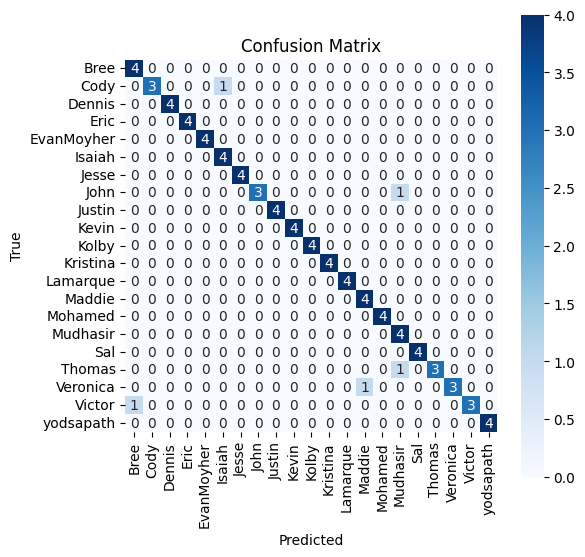

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dls.vocab, yticklabels=dls.vocab, square=True)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()